## 16.6 Homework

Write a program to find the minium of 
    $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
    
- 1, from your own code (except Monte Carlo)
- 2, from scipy

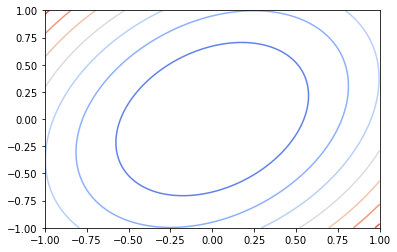

In [46]:
"""
Erick Serrano
HW16
From your own code

Gradient Descent
"""

import numpy as np
import matplotlib.pyplot as plt

#First we get the function:

def f(x,y):
    return 1/2*x**2 + 1/3*y**2 - x*y/4

a = -1
b = 1
points = 200
x = np.linspace(a, b , points)
y = np.linspace(a, b, points)

nx, ny = np.meshgrid(x, y)

z = f(nx, ny)

plt.contour(x, y, z, cmap = 'coolwarm')
plt.show()


In [42]:
#Initial values
x0 = np.random.random()
y0 = np.random.random()
iterations = 1000
alpha = .1
prev_x = x0
prev_y = y0

#Hand-Derivatives with respect to x,y
def fx(x,y):
    return x - y/4
def fy(x,y):
    return 2/3*y - x/4    

"""
Gradient Descent
"""
for i in range(iterations):    
    dx = fx(prev_x, prev_y)
    dy = fy(prev_x,prev_y)
    
    new_x = prev_x - dx*alpha
    new_y = prev_y - dy*alpha
    
    prev_x = new_x
    prev_y = new_y



In [43]:
print("Ideal version parameters: ", new_x, new_y)
print("These values yield a minimum value of: ", f(new_x,new_y))

Ideal version parameters:  6.2234522490542145e-25 1.1628626897491695e-24
These values yield a minimum value of:  4.634811573383299e-49


### Scikit Version

In [51]:
"""
From SciKit
"""
from scipy.optimize import minimize

#Using init() function from lec16:
def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]


[x0, y0] = init(a, b, a, b)

#Change function
def f(params):
    return 1/2*params[0]**2 + 1/3*params[1]**2 - params[0]*params[1]/4 

#Code taken from lec16 to find the minimum of a 2-D function 
result = minimize(f, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 76
